In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import itertools
from collections import Counter
import nltk
from nltk.stem.snowball import SnowballStemmer

import string
from nltk import wordpunct_tokenize

from wordcloud import WordCloud
from datetime import datetime
import pickle
import re

#progress bar
from tqdm import tqdm, tqdm_notebook

# instantiate
tqdm.pandas(tqdm_notebook)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/home/rpo/workspace/git/dataanalyticsproject/src/venv/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


### Scommentare se si usano i dati iniziali

In [5]:
dataReviewsChunk = pd.read_json('../data/reviews.json', lines=True, chunksize=10000)

In [6]:
dataReviewsChunk

In [7]:

chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in dataReviewsChunk:

    chunk_list.append(chunk)

In [8]:
dataReviews = pd.concat(chunk_list)

In [ ]:
## elimino recensioni non verificate e quelli con helpfull == 0

In [13]:
def convert_to_int(field):
    return field["$numberInt"]

In [14]:
dataReviews["rating"]=dataReviews["rating"].apply(convert_to_int).astype(int)

In [17]:
dataReviews["helpful"]=dataReviews["helpful"].apply(convert_to_int).astype(int)

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["verified"] == True]'''

In [ ]:
'''len(dataReviews.loc[dataReviews["verified"] == False])'''

In [ ]:
'''len(dataReviews.loc[dataReviews["helpful"] == 0]) - len(dataReviews.loc[dataReviews["helpful"] != 0])'''

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["helpful"] != 0]
dataReviews'''

### Dati filtrati (vedi sopra)

In [ ]:
dataReviews = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [ ]:
dataReviews

In [ ]:
counts = dataReviews["rating"].value_counts()

In [ ]:
counts.values

In [ ]:
x = counts._index
print(x)
y = counts.values
print(y)

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [ ]:
print("Proportion of review with score=1: {}%".format(len(dataReviews[dataReviews.rating == 1]) / len(dataReviews)*100))
print("Proportion of review with score=2: {}%".format(len(dataReviews[dataReviews.rating == 2]) / len(dataReviews)*100))
print("Proportion of review with score=3: {}%".format(len(dataReviews[dataReviews.rating == 3]) / len(dataReviews)*100))
print("Proportion of review with score=4: {}%".format(len(dataReviews[dataReviews.rating == 4]) / len(dataReviews)*100))
print("Proportion of review with score=5: {}%".format(len(dataReviews[dataReviews.rating == 5]) / len(dataReviews)*100))

In [ ]:
# recensioni vuote
dataReviews[dataReviews["body"].str.len() == 0]

In [ ]:
dataReviews.loc[dataReviews['rating'] == 3 , 'polarity'] = 'neutral'
dataReviews.loc[dataReviews['rating'] > 3 , 'polarity'] = 'positive'
dataReviews.loc[dataReviews['rating'] < 3 , 'polarity'] = 'negative'

In [ ]:
counts = dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [ ]:
def undersampling(df):
    positive, negative, _ = df.polarity.value_counts()
    df_positive = df[df.polarity == 'positive']
    df_positive = df_positive.sample(negative, random_state=1)
    df_negative = df[df.polarity == 'negative']
    df = pd.concat([df_positive, df_negative])
    #df = df.sample(frac=1)
    return df

In [ ]:
new_dataReviews = undersampling(dataReviews)

In [ ]:
counts = new_dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

### Funzioni varie

In [ ]:
def flat_list(l):
    return  [item for sublist in l for item in sublist]

In [ ]:
def plot_common_tokens(tokens, title, n=20):
    sentences = (list(itertools.chain(tokens)))
    flat_sentences = flat_list(sentences)
    counts = Counter(flat_sentences)
    #print(counts.most_common(30))
    common_words = [word[0] for word in counts.most_common(n)]
    common_counts = [word[1] for word in counts.most_common(n)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=common_words, y=common_counts)
    plt.title(title)
    plt.show()

In [ ]:
def word_Cloud(sentences):
    flat_sentences = flat_list(sentences)
    unique_string=(" ").join(flat_sentences)

    wordcloud = WordCloud(background_color="white").generate(unique_string)
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Tokenizzazione

In [ ]:
new_dataReviews['token']=new_dataReviews['body'].progress_apply(word_tokenize)

In [ ]:
#new_dataReviews['token'] #Name: token, Length: 130648, dtype: object

### Stopwords

In [68]:
stop_words=nltk.corpus.stopwords.words('italian')
stop_words

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["token"].progress_apply(lambda sentence : [word for word in sentence if word.lower() not in stop_words])

### Punctuation

In [70]:
punctuation = string.punctuation
punctuation = punctuation + "..."+ "''" + "``" + "--"+ ".."
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~...''``--..


In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if word not in punctuation])

### Numbers

In [ ]:
regex_numbers = r'(?:(?:\d+,?)+(?:\.?\d+)?)'

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [re.sub(regex_numbers,"",word) for word in sentence if re.sub(regex_numbers,"",word) != ""])

### Eliminazione token di lunghezza 1

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if len(word)> 1])

In [ ]:
new_dataReviews.to_csv("dati_puliti.csv")

In [ ]:
plot_common_tokens(new_dataReviews['cleaned'],'Most Common Tokens used in Reviews')

In [ ]:
word_Cloud(new_dataReviews["cleaned"])

In [ ]:
sentences = (list(itertools.chain(new_dataReviews["cleaned"])))
flat_sentences = flat_list(sentences)
counts = Counter(flat_sentences)
counts.most_common()

### Stemming

In [71]:
stemmer = SnowballStemmer("italian")
def stemming_token(sentence,stemmer):
    stem = []
    for elem in sentence:
        stem.append(stemmer.stem(elem))
    return stem

In [ ]:
new_dataReviews["stemming"]=[stemming_token(row["cleaned"], stemmer) for _, row in tqdm(new_dataReviews.iterrows())]

In [ ]:
#new_dataReviews = pd.read_csv("../data/dati_finali.csv", sep=",", index_col=0)

In [ ]:
### da fare solo se si legge il csv finale

In [ ]:
#def str_to_list(sentence):
#   return ast.literal_eval(sentence)

In [ ]:
#import ast

#new_dataReviews["stemming"] = new_dataReviews["stemming"].progress_apply(str_to_list)

In [ ]:
len(new_dataReviews)

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
count_vect = CountVectorizer(stop_words=None, lowercase=True)
#lowercase = true -> Convert all characters to lowercase before tokenizing.
#stop_words = None -> If None, no stop words will be used
bow = count_vect.fit(new_dataReviews['stemming'].apply(lambda x: " ".join(x)))

In [ ]:
import pickle
with open('../model/bow.bin', 'wb') as f:
    pickle.dump(bow, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [64]:
with open('../model/bow.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    bow = pickle.load(f)

/home/rpo/workspace/git/dataanalyticsproject/src/venv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
count_vect

In [ ]:
bow.get_feature_names()[::2000]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(bow, new_dataReviews['polarity'], test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(new_dataReviews['stemming'].apply(lambda x: " ".join(x)), new_dataReviews['polarity'], test_size=0.2, random_state=1)    

In [ ]:
print("train size: ",len(X_train))
print("test size:",len(X_test))

In [ ]:
print("y train distribution:\n",y_train.value_counts())
print("y train distribution:\n",y_test.value_counts())

In [ ]:
model = LogisticRegression()
model.fit(bow.transform(X_train), y_train)

In [ ]:
predictions = model.predict(bow.transform(X_test))

In [ ]:
predictions

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

In [ ]:
confusion_matrix(y_test, predictions)

In [66]:
def clean_sentence(sentence):
    tokens = word_tokenize(sentence)
    tokens_clean = []
    for word in tokens:
        if word.lower() not in stop_words and word.lower() not in punctuation and not word.isnumeric() and len(word)> 1:
            
            tokens_clean.append(stemmer.stem(word))
    return ' '.join(tokens_clean)

In [ ]:
sentence="belle le scarpe e le stringhe per il colore , però sono comode"

In [ ]:
clean_sentence(sentence)

In [ ]:
print(bow.transform([clean_sentence(sentence)]))

In [ ]:
model.predict(bow.transform([clean_sentence(sentence)]))

In [ ]:

with open('../model/model.bin', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [62]:
with open('../model/model.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    model = pickle.load(f)

/home/rpo/workspace/git/dataanalyticsproject/src/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/rpo/workspace/git/dataanalyticsproject/src/venv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
model.predict(bow.transform([clean_sentence(sentence)]))

### Sentimenti recensioni neutre

In [ ]:
#dataReviews_neutre = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [73]:
dataReviews_neutre = dataReviews.loc[dataReviews["rating"]==3]

In [ ]:
dataReviews_neutre

In [ ]:
dataReviews_neutre["polarity"] = dataReviews_neutre["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)])))

In [ ]:
dataReviews_neutre["polarity"]

In [ ]:
print("Proportion of review with score=3 that is positive: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "positive"]) / len(dataReviews_neutre)*100))
print("Proportion of review with score=3 that is negative: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "negative"]) / len(dataReviews_neutre)*100))

In [ ]:
dataReviews_neutre["polarity"].value_counts().plot(kind="bar")


### Prodotti nel tempo

In [4]:
dataReviewsReduced = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

FileNotFoundError: [Errno 2] File ../data/dati_ridotti.csv does not exist: '../data/dati_ridotti.csv'

In [99]:
# look for good examples
top_prods = dataReviews.groupby('product').count().sort_values('_id', ascending=False).head(4)

In [105]:
"B01ETRGE7M" in top_prods.index

True

In [106]:
# GOOD EXAMPLES:
# B01ETRGE7M bello
# B00LPHUTOO altalena
# B01EWQ10D8 non male
# B0058BXHWE resegono
# ... non ne ho piu provati di quelli del box sopra
prod = "B01ETRGE7M" 
dataReviews_prodotti = dataReviews[dataReviews["product"].isin(top_prods.index)]

5000

In [107]:
dataReviews_prodotti

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body
15374,R1JWRYRD2QJBPU,B01ETRGE7M,very good,AFFXBJ3HLCETFAMKAWAX2STT2NCA,Xxxx,2019-01-14,5,252,True,"Utile e funzionale, da acquistare"
15375,R2YNQPDQNTKRW7,B01ETRGE7M,inmancabile,AFADQ5CXWECICH4PZQKY5KJ63YTQ,sebastiano,2017-12-31,5,240,True,devo dire che questa piccola pennetta da attac...
15376,R1YM94DSZI7K7R,B01ETRGE7M,Talmente entusiasta che già l'ho consigliato a...,AGSGI4XBH46OAS46EATYOVDKTPEA,Spiaggia dei Maronti,2018-10-13,4,447,True,Come nel titolo.\nTalmente entusiasta che già ...
15377,R37AGG061VEJIA,B01ETRGE7M,Non c’è il tasto Search! Assurdo. Devi cercare...,AGQNCTJHHDUIPBQTSLZOLTOJVSAA,lu239,2018-09-22,2,144,True,Non c’è il tasto Search. Se scarichi qualcosa ...
15378,R1CV0GOGENYYX8,B01ETRGE7M,Staconsigliata! NETFLIX - INFINITY - AMAZON PR...,AFNCTVOMQMNJDHTETJL4FZPYBXYQ,Soad,2019-01-09,5,1,True,"Che dire, straconsigliata.\nCercherò di scrive..."
...,...,...,...,...,...,...,...,...,...,...
246882,R3K6TXOFBONGP9,B00G9WHN12,Ottima pennetta usb,AHR4OIXCRNLD2WYSASUSRGSOQGIA,Alfredo Pagano,2016-06-21,5,0,False,"Pennetta arrivata nei tempi previsti, ottima v..."
246883,R2W3AULQWTD061,B00G9WHN12,Ottimo pen drive.,AESM5FJ4MINHNU24WSKW43OY6WAA,Nicola,2015-02-11,5,0,False,Da quello che hanno scritto altri utenti mi as...
246884,R2MX0XOQD25ZEV,B00G9WHN12,Dopo 2 anni ancora perfetta,AEBELCAJVI2Z4DJZKDAKQQRVFSWQ,Massimiliano B.,2015-06-20,4,1,False,"Questa pendrive ""G4"" ovvero di quarta generazi..."
246885,R187UZY6HS5O47,B00G9WHN12,Arriva nel blister originale e non scalda,AH2VTYB5VICOIVE6BYYPLYKPL7IQ,Cristian Bregant,2019-02-01,5,0,True,"La marca mi ha aiutato nella scelta , avevo gi..."


In [108]:
dataReviews_prodotti["Period"] = dataReviews_prodotti["date"].apply(lambda x: x.strftime('%Y-%m'))

<ipython-input-108-46433dd61d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataReviews_prodotti["Period"] = dataReviews_prodotti["date"].apply(lambda x: x.strftime('%Y-%m'))


In [109]:
dataReviews_prodotti["Period"].iloc[0]

'2019-01'

In [110]:
dataReviews_prodotti

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period
15374,R1JWRYRD2QJBPU,B01ETRGE7M,very good,AFFXBJ3HLCETFAMKAWAX2STT2NCA,Xxxx,2019-01-14,5,252,True,"Utile e funzionale, da acquistare",2019-01
15375,R2YNQPDQNTKRW7,B01ETRGE7M,inmancabile,AFADQ5CXWECICH4PZQKY5KJ63YTQ,sebastiano,2017-12-31,5,240,True,devo dire che questa piccola pennetta da attac...,2017-12
15376,R1YM94DSZI7K7R,B01ETRGE7M,Talmente entusiasta che già l'ho consigliato a...,AGSGI4XBH46OAS46EATYOVDKTPEA,Spiaggia dei Maronti,2018-10-13,4,447,True,Come nel titolo.\nTalmente entusiasta che già ...,2018-10
15377,R37AGG061VEJIA,B01ETRGE7M,Non c’è il tasto Search! Assurdo. Devi cercare...,AGQNCTJHHDUIPBQTSLZOLTOJVSAA,lu239,2018-09-22,2,144,True,Non c’è il tasto Search. Se scarichi qualcosa ...,2018-09
15378,R1CV0GOGENYYX8,B01ETRGE7M,Staconsigliata! NETFLIX - INFINITY - AMAZON PR...,AFNCTVOMQMNJDHTETJL4FZPYBXYQ,Soad,2019-01-09,5,1,True,"Che dire, straconsigliata.\nCercherò di scrive...",2019-01
...,...,...,...,...,...,...,...,...,...,...,...
246882,R3K6TXOFBONGP9,B00G9WHN12,Ottima pennetta usb,AHR4OIXCRNLD2WYSASUSRGSOQGIA,Alfredo Pagano,2016-06-21,5,0,False,"Pennetta arrivata nei tempi previsti, ottima v...",2016-06
246883,R2W3AULQWTD061,B00G9WHN12,Ottimo pen drive.,AESM5FJ4MINHNU24WSKW43OY6WAA,Nicola,2015-02-11,5,0,False,Da quello che hanno scritto altri utenti mi as...,2015-02
246884,R2MX0XOQD25ZEV,B00G9WHN12,Dopo 2 anni ancora perfetta,AEBELCAJVI2Z4DJZKDAKQQRVFSWQ,Massimiliano B.,2015-06-20,4,1,False,"Questa pendrive ""G4"" ovvero di quarta generazi...",2015-06
246885,R187UZY6HS5O47,B00G9WHN12,Arriva nel blister originale e non scalda,AH2VTYB5VICOIVE6BYYPLYKPL7IQ,Cristian Bregant,2019-02-01,5,0,True,"La marca mi ha aiutato nella scelta , avevo gi...",2019-02


In [111]:
dataReviews_prodotti["polarity"] = dataReviews_prodotti["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)]))[0])

100%|██████████| 17910/17910 [00:49<00:00, 363.64it/s]
<ipython-input-111-02405ad432b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataReviews_prodotti["polarity"] = dataReviews_prodotti["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)]))[0])


In [112]:
dataReviews_prodotti

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period,polarity
15374,R1JWRYRD2QJBPU,B01ETRGE7M,very good,AFFXBJ3HLCETFAMKAWAX2STT2NCA,Xxxx,2019-01-14,5,252,True,"Utile e funzionale, da acquistare",2019-01,positive
15375,R2YNQPDQNTKRW7,B01ETRGE7M,inmancabile,AFADQ5CXWECICH4PZQKY5KJ63YTQ,sebastiano,2017-12-31,5,240,True,devo dire che questa piccola pennetta da attac...,2017-12,positive
15376,R1YM94DSZI7K7R,B01ETRGE7M,Talmente entusiasta che già l'ho consigliato a...,AGSGI4XBH46OAS46EATYOVDKTPEA,Spiaggia dei Maronti,2018-10-13,4,447,True,Come nel titolo.\nTalmente entusiasta che già ...,2018-10,positive
15377,R37AGG061VEJIA,B01ETRGE7M,Non c’è il tasto Search! Assurdo. Devi cercare...,AGQNCTJHHDUIPBQTSLZOLTOJVSAA,lu239,2018-09-22,2,144,True,Non c’è il tasto Search. Se scarichi qualcosa ...,2018-09,negative
15378,R1CV0GOGENYYX8,B01ETRGE7M,Staconsigliata! NETFLIX - INFINITY - AMAZON PR...,AFNCTVOMQMNJDHTETJL4FZPYBXYQ,Soad,2019-01-09,5,1,True,"Che dire, straconsigliata.\nCercherò di scrive...",2019-01,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
246882,R3K6TXOFBONGP9,B00G9WHN12,Ottima pennetta usb,AHR4OIXCRNLD2WYSASUSRGSOQGIA,Alfredo Pagano,2016-06-21,5,0,False,"Pennetta arrivata nei tempi previsti, ottima v...",2016-06,positive
246883,R2W3AULQWTD061,B00G9WHN12,Ottimo pen drive.,AESM5FJ4MINHNU24WSKW43OY6WAA,Nicola,2015-02-11,5,0,False,Da quello che hanno scritto altri utenti mi as...,2015-02,negative
246884,R2MX0XOQD25ZEV,B00G9WHN12,Dopo 2 anni ancora perfetta,AEBELCAJVI2Z4DJZKDAKQQRVFSWQ,Massimiliano B.,2015-06-20,4,1,False,"Questa pendrive ""G4"" ovvero di quarta generazi...",2015-06,positive
246885,R187UZY6HS5O47,B00G9WHN12,Arriva nel blister originale e non scalda,AH2VTYB5VICOIVE6BYYPLYKPL7IQ,Cristian Bregant,2019-02-01,5,0,True,"La marca mi ha aiutato nella scelta , avevo gi...",2019-02,negative


In [177]:
dataReviews_prodotti["polarityNum"] = dataReviews_prodotti["polarity"].apply(lambda x: 1 if x == "positive" else 0)

<ipython-input-177-a1c4abefe6f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataReviews_prodotti["polarityNum"] = dataReviews_prodotti["polarity"].apply(lambda x: 1 if x == "positive" else 0)


In [179]:
dataReviews_prodotti

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period,polarity,polarityNum
15374,R1JWRYRD2QJBPU,B01ETRGE7M,very good,AFFXBJ3HLCETFAMKAWAX2STT2NCA,Xxxx,2019-01-14,5,252,True,"Utile e funzionale, da acquistare",2019-01,positive,1
15375,R2YNQPDQNTKRW7,B01ETRGE7M,inmancabile,AFADQ5CXWECICH4PZQKY5KJ63YTQ,sebastiano,2017-12-31,5,240,True,devo dire che questa piccola pennetta da attac...,2017-12,positive,1
15376,R1YM94DSZI7K7R,B01ETRGE7M,Talmente entusiasta che già l'ho consigliato a...,AGSGI4XBH46OAS46EATYOVDKTPEA,Spiaggia dei Maronti,2018-10-13,4,447,True,Come nel titolo.\nTalmente entusiasta che già ...,2018-10,positive,1
15377,R37AGG061VEJIA,B01ETRGE7M,Non c’è il tasto Search! Assurdo. Devi cercare...,AGQNCTJHHDUIPBQTSLZOLTOJVSAA,lu239,2018-09-22,2,144,True,Non c’è il tasto Search. Se scarichi qualcosa ...,2018-09,negative,0
15378,R1CV0GOGENYYX8,B01ETRGE7M,Staconsigliata! NETFLIX - INFINITY - AMAZON PR...,AFNCTVOMQMNJDHTETJL4FZPYBXYQ,Soad,2019-01-09,5,1,True,"Che dire, straconsigliata.\nCercherò di scrive...",2019-01,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246882,R3K6TXOFBONGP9,B00G9WHN12,Ottima pennetta usb,AHR4OIXCRNLD2WYSASUSRGSOQGIA,Alfredo Pagano,2016-06-21,5,0,False,"Pennetta arrivata nei tempi previsti, ottima v...",2016-06,positive,1
246883,R2W3AULQWTD061,B00G9WHN12,Ottimo pen drive.,AESM5FJ4MINHNU24WSKW43OY6WAA,Nicola,2015-02-11,5,0,False,Da quello che hanno scritto altri utenti mi as...,2015-02,negative,0
246884,R2MX0XOQD25ZEV,B00G9WHN12,Dopo 2 anni ancora perfetta,AEBELCAJVI2Z4DJZKDAKQQRVFSWQ,Massimiliano B.,2015-06-20,4,1,False,"Questa pendrive ""G4"" ovvero di quarta generazi...",2015-06,positive,1
246885,R187UZY6HS5O47,B00G9WHN12,Arriva nel blister originale e non scalda,AH2VTYB5VICOIVE6BYYPLYKPL7IQ,Cristian Bregant,2019-02-01,5,0,True,"La marca mi ha aiutato nella scelta , avevo gi...",2019-02,negative,0


In [182]:
#dataReviews_prodotti_month = dataReviews_prodotti.groupby(['product', 'Period']).progress_apply(lambda x: len(x.loc[x["polarity"]=="positive"])/len(x)).to_frame("polarity")

# use the rating intead of polarity
dataReviews_prodotti_month = dataReviews_prodotti[["product", "Period", "rating", "polarityNum"]]\
    .groupby(['product', 'Period']).mean()#.progress_apply(lambda x: len(x.loc[x["rating"]>3])/len(x))




In [282]:
def trendline(df, order=1):
    coeffs = np.polyfit(range(0,len(df.index)), df, order)
    #slope = coeffs[-2]
    return coeffs[-2], [coeffs[-2] * x + coeffs[-1] for x in range(0,len(df.index))]



In [187]:
dataReviews_prodotti_month["rating"] = dataReviews_prodotti_month["rating"] / 5

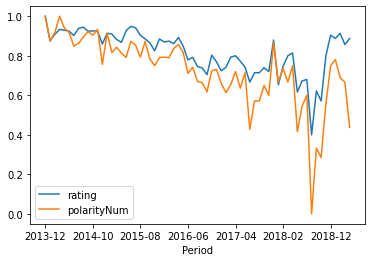

In [188]:
dataReviews_prodotti_month.loc["B00G9WHN12"].plot()

In [191]:
dataReviews_prodotti_month[["rating", "polarityNum"]]

rating  polarityNum
product    Period                        
B00G9WHN12 2013-12  1.000000     1.000000
           2014-01  0.875000     0.875000
           2014-02  0.908333     0.916667
           2014-03  0.933333     1.000000
           2014-04  0.929412     0.941176
...                      ...          ...
B01ETRGE7M 2018-12  0.897422     0.841248
           2019-01  0.914878     0.853107
           2019-02  0.919361     0.840319
           2019-03  0.912023     0.859238
           2019-04  0.890909     0.834711

[184 rows x 2 columns]

In [299]:
coeffs = []
lines = []
for i in dataReviews_prodotti_month.index.get_level_values(0).value_counts().index:
    coeff, line = trendline(dataReviews_prodotti_month.loc[i]["polarityNum"])
    lines += line
    coeffs += [coeff] * len(line)

In [300]:
len(lines)

184

In [303]:
dataReviews_prodotti_month["trendCoeff"] = coeffs
dataReviews_prodotti_month["trendLine"] = lines

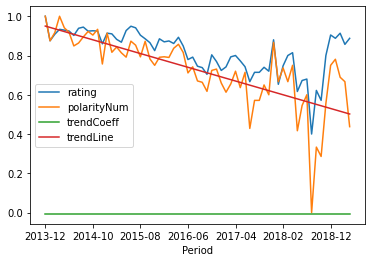

In [314]:
dataReviews_prodotti_month.loc["B00G9WHN12"].plot()

In [315]:
dataReviews_prodotti_month.to_csv("../data/datarevies_prodotti_month.csv")

In [279]:
[coeffs for i in dataReviews_prodotti_month.index.get_level_values(0).value_counts().index coeffs, line = trendline(dataReviews_prodotti_month.loc[i]["polarityNum"])]

SyntaxError: invalid syntax (<ipython-input-279-d6e7a930fdc3>, line 1)

In [277]:
dataReviews_prodotti_month

rating  polarityNum
product    Period                        
B00G9WHN12 2013-12  1.000000     1.000000
           2014-01  0.875000     0.875000
           2014-02  0.908333     0.916667
           2014-03  0.933333     1.000000
           2014-04  0.929412     0.941176
...                      ...          ...
B01ETRGE7M 2018-12  0.897422     0.841248
           2019-01  0.914878     0.853107
           2019-02  0.919361     0.840319
           2019-03  0.912023     0.859238
           2019-04  0.890909     0.834711

[184 rows x 2 columns]

In [275]:
[1] * 5

[1, 1, 1, 1, 1]

In [253]:
dataReviews_prodotti_month.apply(trendline)

rating         ([0.0005011973351378648, 0.8401951424814792], ...
polarityNum    ([0.00039113360296185693, 0.7721015584546075],...
dtype: object

In [247]:
[1,2,3,4][-2:]

[3, 4]

In [250]:
myp

,rating,polarityNum,trend
Period,,,
2013-12,1.000000,1.000000,0.938582
2014-01,0.875000,0.875000,0.934858
2014-02,0.908333,0.916667,0.931134
2014-03,0.933333,1.000000,0.927410
2014-04,0.929412,0.941176,0.923686
...,...,...,...
2018-12,0.904545,0.750000,0.715135
2019-01,0.887671,0.780822,0.711411
2019-02,0.913514,0.689189,0.707687


In [249]:
trendline(myp["rating"])

(array([-0.00372411,  0.93858209]),
 [0.938582090382255,
  0.9348579825756781,
  0.9311338747691011,
  0.9274097669625242,
  0.9236856591559472,
  0.9199615513493704,
  0.9162374435427935,
  0.9125133357362165,
  0.9087892279296396,
  0.9050651201230626,
  0.9013410123164857,
  0.8976169045099087,
  0.8938927967033318,
  0.8901686888967548,
  0.8864445810901779,
  0.8827204732836009,
  0.8789963654770241,
  0.8752722576704471,
  0.8715481498638702,
  0.8678240420572932,
  0.8640999342507163,
  0.8603758264441393,
  0.8566517186375624,
  0.8529276108309854,
  0.8492035030244085,
  0.8454793952178317,
  0.8417552874112546,
  0.8380311796046778,
  0.8343070717981008,
  0.8305829639915239,
  0.8268588561849469,
  0.82313474837837,
  0.819410640571793,
  0.8156865327652161,
  0.8119624249586391,
  0.8082383171520622,
  0.8045142093454853,
  0.8007901015389083,
  0.7970659937323314,
  0.7933418859257545,
  0.7896177781191775,
  0.7858936703126006,
  0.7821695625060237,
  0.7784454546994467,


In [ ]:
coeffs[-2]x + coeffs[-1] = y

In [241]:
myp["trend"]=[-0.00372411 * x + 0.93858209 for x in range(0,65)]

In [207]:
myp = dataReviews_prodotti_month.loc["B00G9WHN12"]

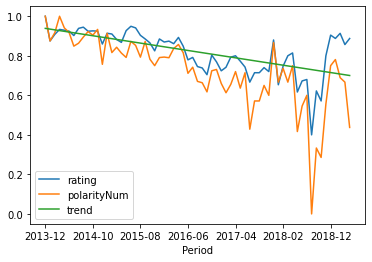

In [242]:
myp.plot()

In [222]:
len(dataReviews_prodotti_month["rating"])

184

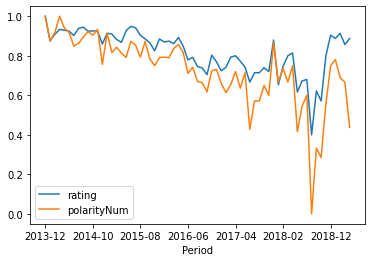

In [224]:
myp.plot()

In [226]:
trendline(range(0,len(myp.index)), myp["polarityNum"], 1)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [197]:
dataReviews_prodotti_month.apply(trendline, axis=1)

TypeError: can only concatenate str (not "float") to str

In [173]:
pd.concat([dataReviews_prodotti_month, dataReviews_prodotti_month_rat]).loc["B00G9WHN12"]

Index(['2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
       '2014-06', '2014-07', '2014-08', '2014-09',
       ...
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04'],
      dtype='object', name='Period', length=130)

In [172]:
dataReviews_prodotti_month.loc["B00G9WHN12"]

,polarity
Period,
2013-12,1.000000
2014-01,0.875000
2014-02,0.916667
2014-03,1.000000
2014-04,0.941176
...,...
2018-12,0.750000
2019-01,0.780822
2019-02,0.689189


In [171]:
dataReviews_prodotti_month_rat.loc["B00G9WHN12"]

,rating
Period,
2013-12,5.000000
2014-01,4.375000
2014-02,4.541667
2014-03,4.666667
2014-04,4.647059
...,...
2018-12,4.522727
2019-01,4.438356
2019-02,4.567568


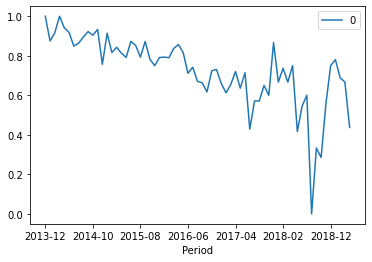

In [141]:
dataReviews_prodotti_month.to_frame().loc["B00G9WHN12"].plot()

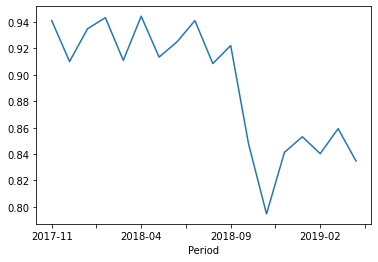

In [80]:
dataReviews_prodotto_month.plot()

In [142]:
dataReviews_prodotto_month_rat

product     Period 
B00G9WHN12  2013-12    1.000000
            2014-01    0.875000
            2014-02    0.916667
            2014-03    0.952381
            2014-04    0.970588
                         ...   
B01ETRGE7M  2018-12    0.880597
            2019-01    0.903955
            2019-02    0.900200
            2019-03    0.894428
            2019-04    0.851240
Length: 184, dtype: float64

In [96]:
dataReviews_prodotto_month_rat

Period
2017-11    1.000000
2017-12    1.000000
2018-01    0.973373
2018-02    0.990566
2018-03    0.963351
2018-04    0.986111
2018-05    0.980769
2018-06    0.958333
2018-07    0.975490
2018-08    0.971429
2018-09    0.933333
2018-10    0.875887
2018-11    0.821497
2018-12    0.880597
2019-01    0.903955
2019-02    0.900200
2019-03    0.894428
2019-04    0.851240
dtype: float64

In [95]:
import json
dataReviews_prodotto_month_rat.to_json()

'{"2017-11":1.0,"2017-12":1.0,"2018-01":0.9733727811,"2018-02":0.9905660377,"2018-03":0.9633507853,"2018-04":0.9861111111,"2018-05":0.9807692308,"2018-06":0.9583333333,"2018-07":0.9754901961,"2018-08":0.9714285714,"2018-09":0.9333333333,"2018-10":0.8758865248,"2018-11":0.8214971209,"2018-12":0.8805970149,"2019-01":0.9039548023,"2019-02":0.9001996008,"2019-03":0.8944281525,"2019-04":0.8512396694}'